In [ ]:
!gdown --id 1ehC6HgSyG_KfvQ6WRB8a8aZnnD6af0OQ

Downloading...
From: https://drive.google.com/uc?id=1ehC6HgSyG_KfvQ6WRB8a8aZnnD6af0OQ
To: /content/EEG.mat
18.9MB [00:00, 51.9MB/s]


In [ ]:
from scipy.io import loadmat
mat = loadmat('EEG.mat')
eeg_raw_data = mat['EEG_RAWdata']
eeg_segmented = mat['EEG_segmented']

In [ ]:
eeg_raw_data.shape

(167868, 30)

In [ ]:
eeg_segmented.shape

(240, 768, 30)

In [ ]:
import pandas as pd

In [ ]:
df_eeg_raw_data=pd.DataFrame(data=eeg_raw_data[:,11:16])

In [ ]:
df_eeg_raw_data.shape

(167868, 5)

# **1.1 Band pass filter EEG_RAWdata 5-20Hz**

In [ ]:
from scipy.signal import butter, lfilter

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
  nyq = 0.5 * fs
  low = lowcut / nyq
  high = highcut / nyq
  b, a = butter(order, [low, high], btype='band')
  return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
  b, a = butter_bandpass(lowcut, highcut, fs, order=order)
  y = lfilter(b, a, data)
  return y

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

In [ ]:
fs = 256.0
lowcut = 5.0
highcut = 20.0

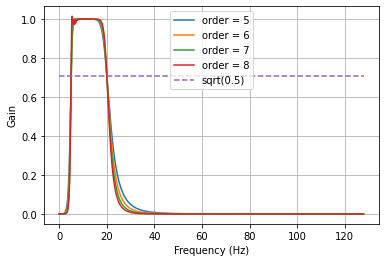

In [ ]:
# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [5,6,7,8]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
          '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

In [ ]:
y=[0,0,0,0,0]
for i in range(5):
  y[i] = butter_bandpass_filter(df_eeg_raw_data[i], lowcut, highcut, fs, order=7)

In [ ]:
df_y=pd.DataFrame(data=y)

In [ ]:
df_output=df_y.T

In [ ]:
df_output.shape

(167868, 5)

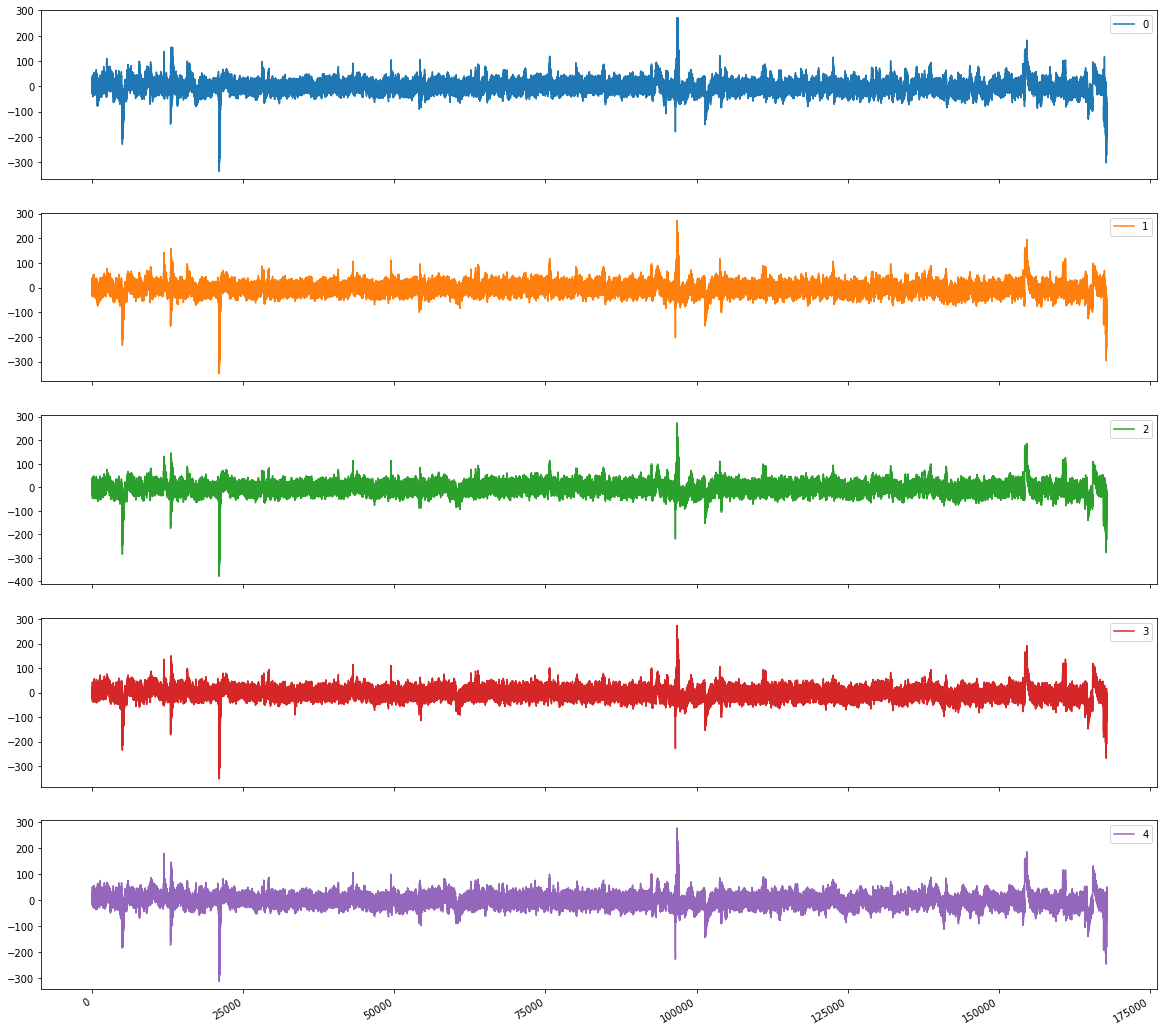

In [ ]:
axes = df_eeg_raw_data.plot(subplots=True, figsize =[20, 20])

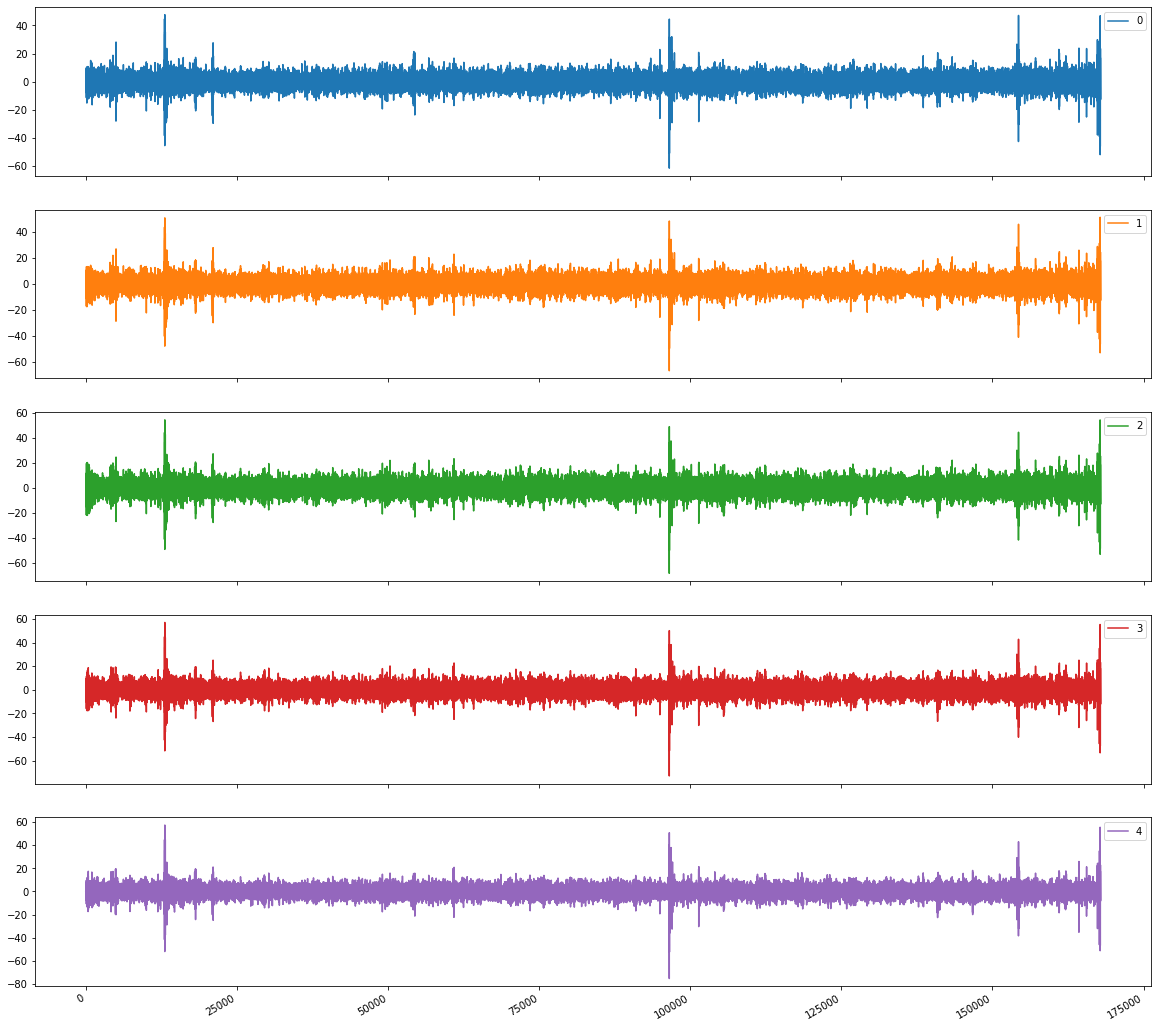

In [ ]:
filtered = df_output.plot(subplots=True, figsize =[20, 20])

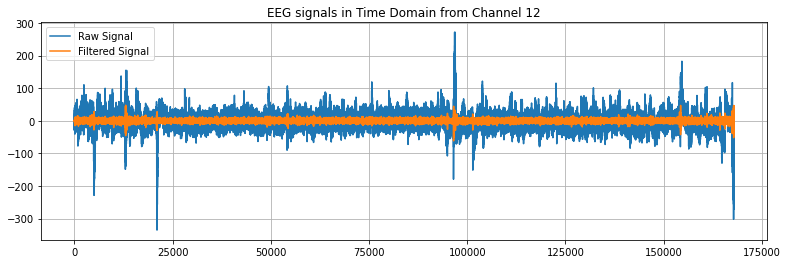

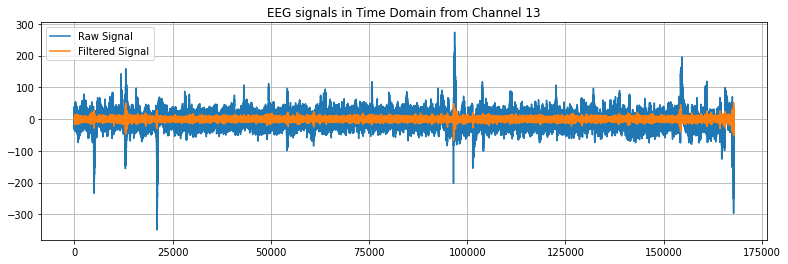

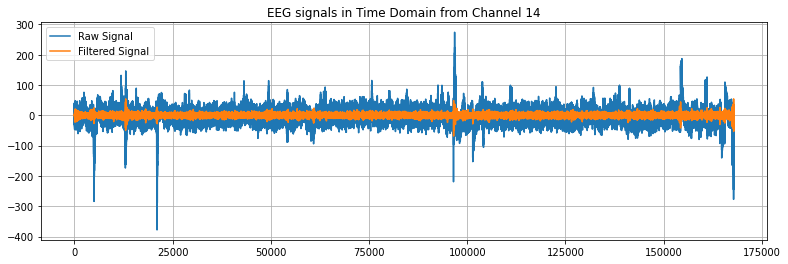

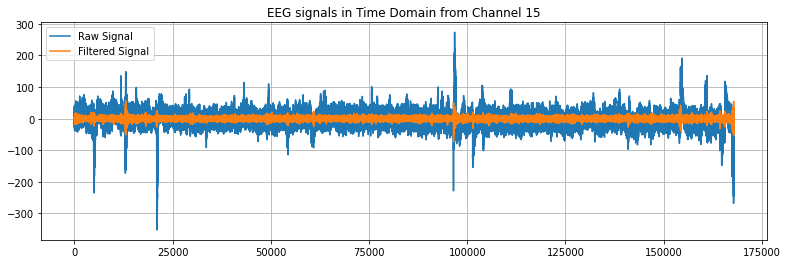

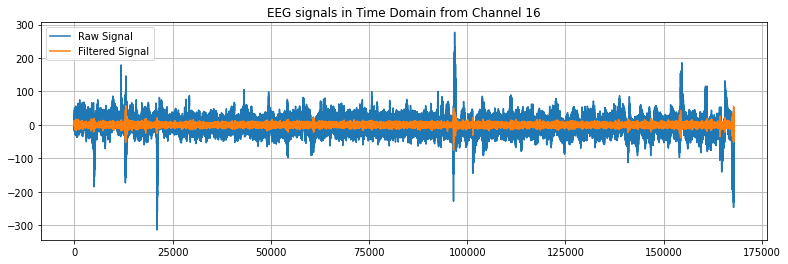

In [ ]:
for i in range(5):
  plt.figure(figsize=(13,4))
  plt.plot(df_eeg_raw_data[i].values, label="Raw Signal")
  plt.plot(df_output[i].values, label="Filtered Signal")
  plt.title("EEG signals in Time Domain from Channel %i" %(i+12))
  plt.grid()
  plt.legend(loc='upper left')
  plt.show()

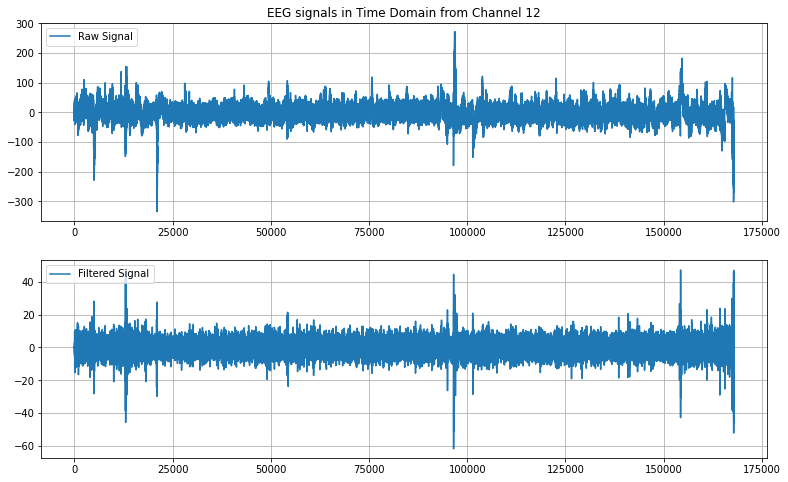

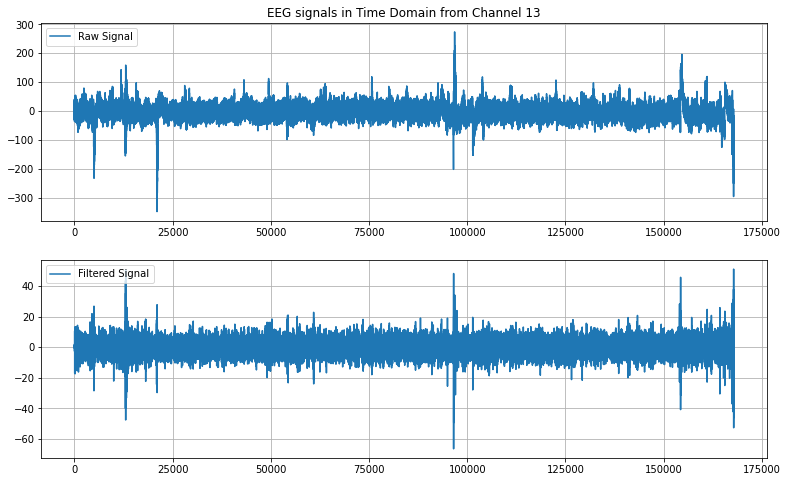

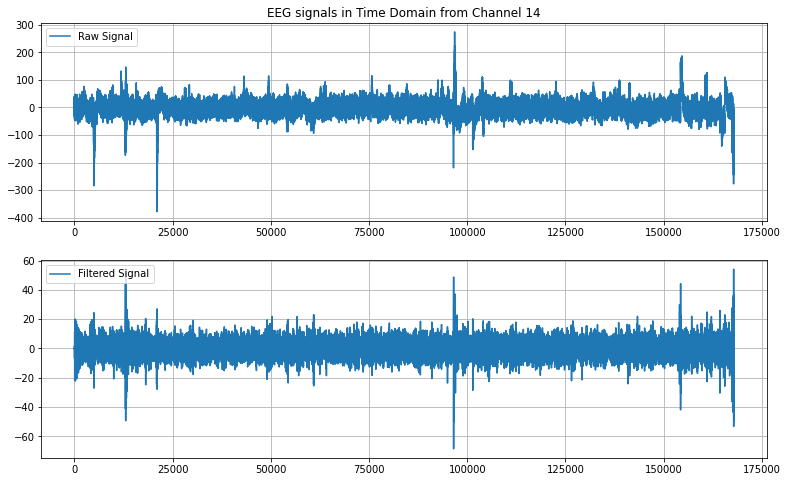

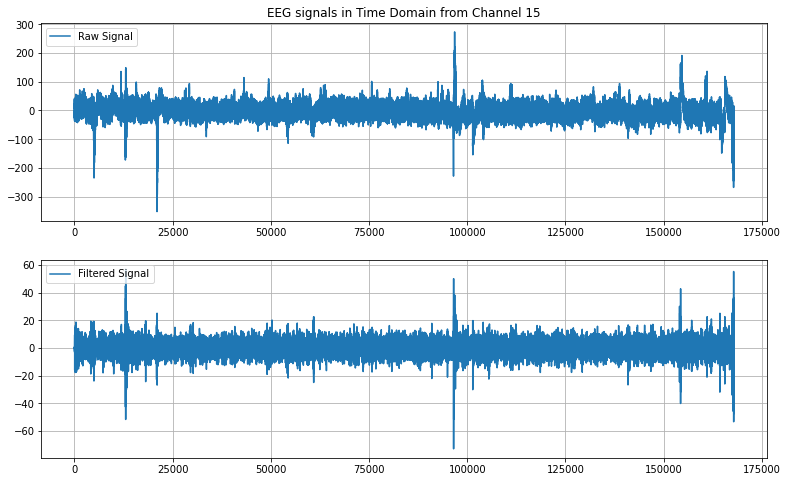

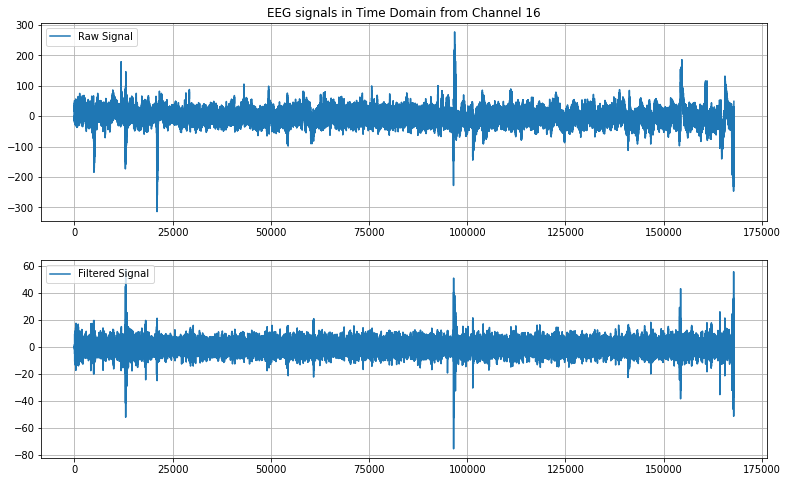

In [ ]:
for i in range(5):
  
  plt.figure(figsize=(13,8))
  # plt.plot(df_eeg_raw_data[i].values, label="Raw Signal")
  # plt.plot(df_output[i].values, label="Filtered Signal")
  # plt.title("EEG signals in Time Domain from Channel %i" %(i+12))
  
  plt.subplot(2, 1, 1)
  # plt.ylim([-400, 300])
  plt.gca().set_title("EEG signals in Time Domain from Channel %i" %(i+12))
  plt.plot(df_eeg_raw_data[i].values, label="Raw Signal")
  plt.grid()
  plt.legend(loc='upper left')

  plt.subplot(2, 1, 2)
  # plt.ylim([-400, 300])
  plt.plot(df_output[i].values, label="Filtered Signal")

  plt.grid()
  plt.legend(loc='upper left')
  plt.show()



# **1.2 Frequncy**

In [ ]:
from scipy.fft import fft, fftfreq

In [ ]:
N = 167868
T= 1/fs

In [ ]:
# freq_raw=[0,0,0,0,0]
power=[0,0,0,0,0]
xf = fftfreq(N, T)[:N//2]
for i in range(5):
  freq_raw = fft(df_eeg_raw_data[i].values)[:N//2]
  power[i] =10*np.log10(np.abs(freq_raw)**2)
  # freq_raw[i] = fft(df_eeg_raw_data[i].values)

In [ ]:
df_freq_raw=pd.DataFrame(data=power)

In [ ]:
df_freq_raw=df_freq_raw.T

In [ ]:
df_freq_raw.shape

(83934, 5)

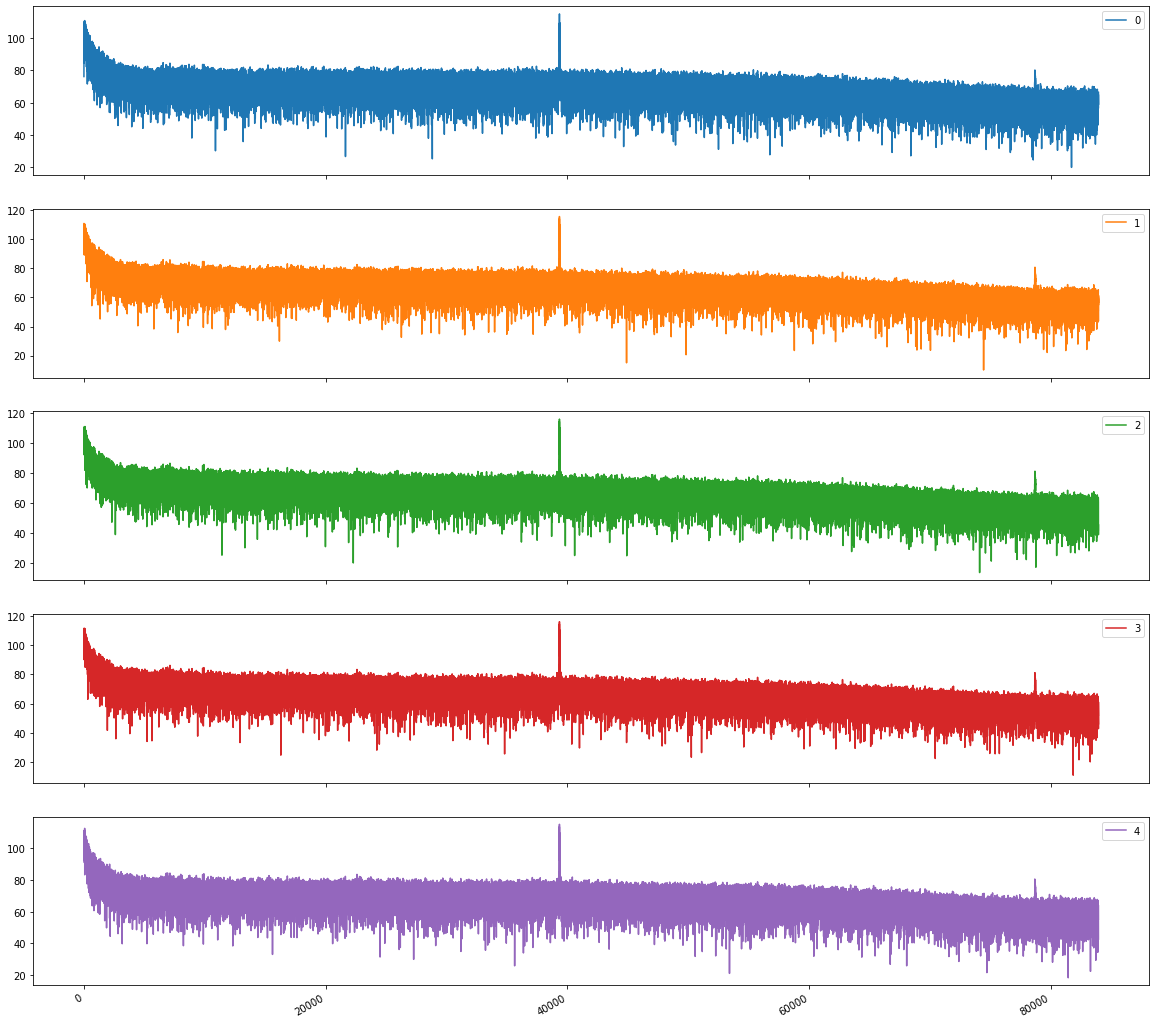

In [ ]:
filtered_freq = df_freq_raw.plot(subplots=True, figsize =[20, 20])

**Frequncy (Filtered)**

In [ ]:
freq_filtered=[0,0,0,0,0]
xf = fftfreq(N, T)[:N//2]
for i in range(5):
  tempp = fft(df_output[i].values)[:N//2]
  freq_filtered[i] =10*np.log10(np.abs(tempp)**2)

In [ ]:
df_freq_filtered=pd.DataFrame(data=freq_filtered)

In [ ]:
df_freq_filtered=df_freq_filtered.T

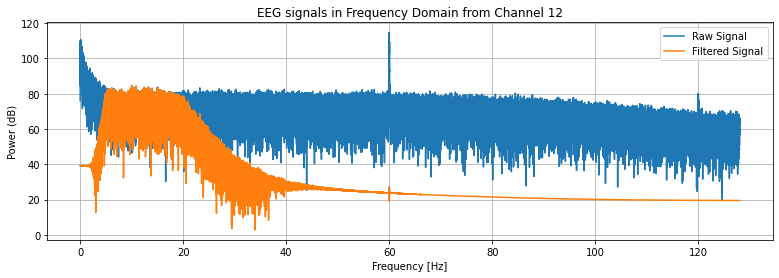

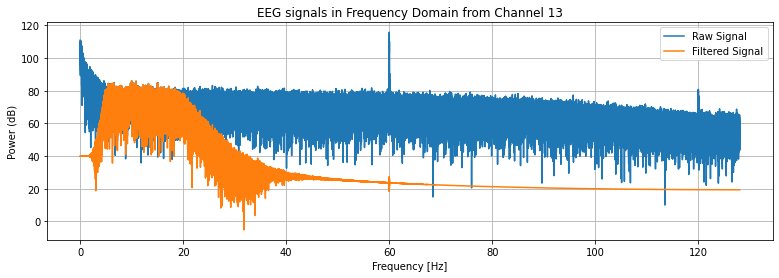

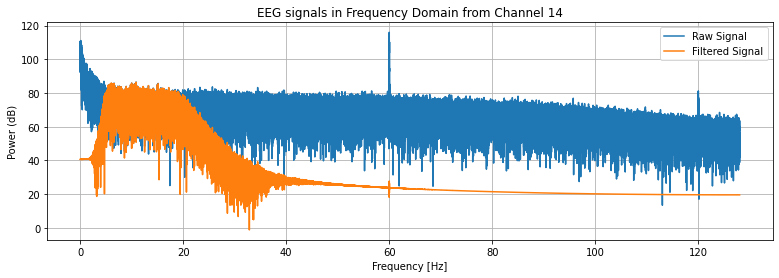

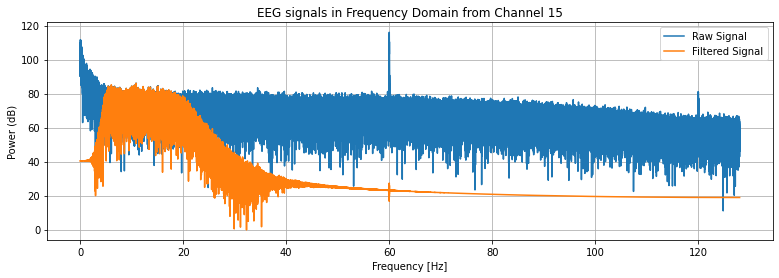

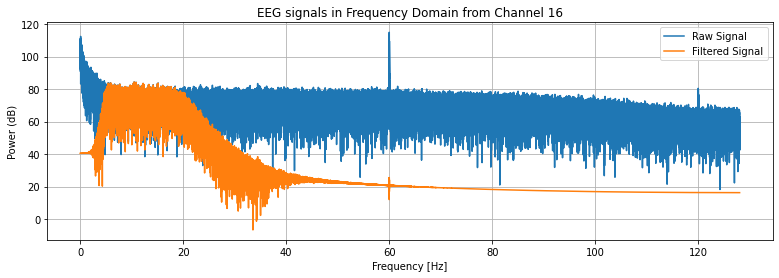

In [ ]:
for i in range(5):
  plt.figure(figsize=(13,4))
  plt.plot(xf, df_freq_raw[i], label="Raw Signal")
  plt.plot(xf, df_freq_filtered[i], label="Filtered Signal")
  plt.xlabel('Frequency [Hz]')
  plt.ylabel('Power (dB)')
  plt.title("EEG signals in Frequency Domain from Channel %i" %(i+12))
  plt.grid()
  plt.legend(loc='upper right')

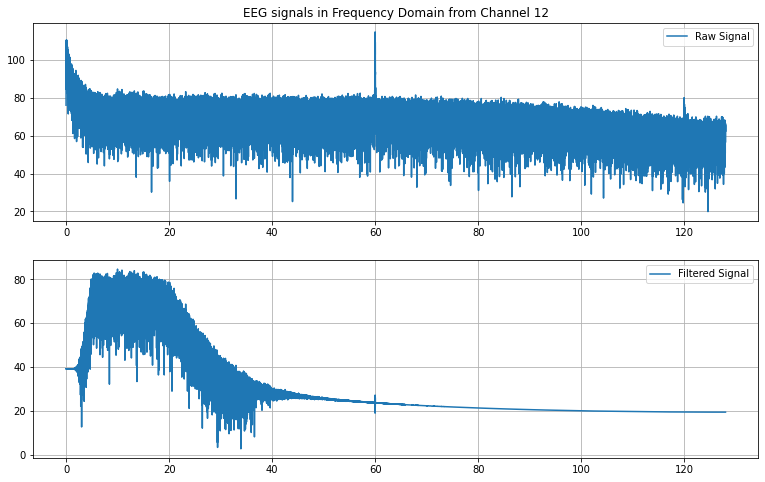

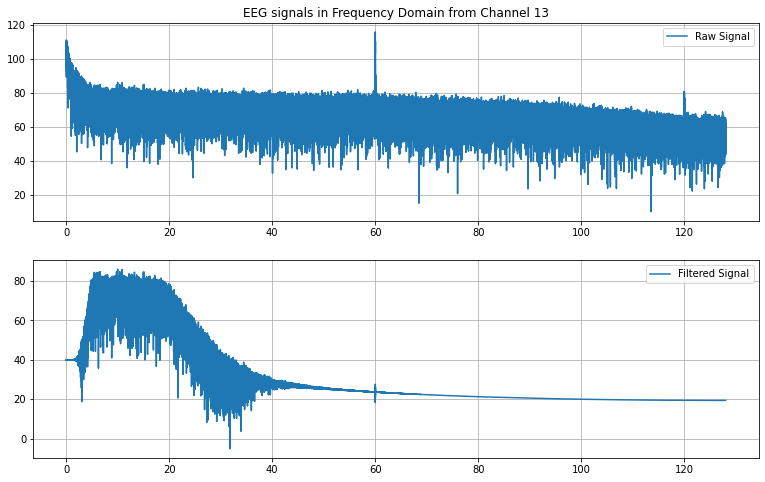

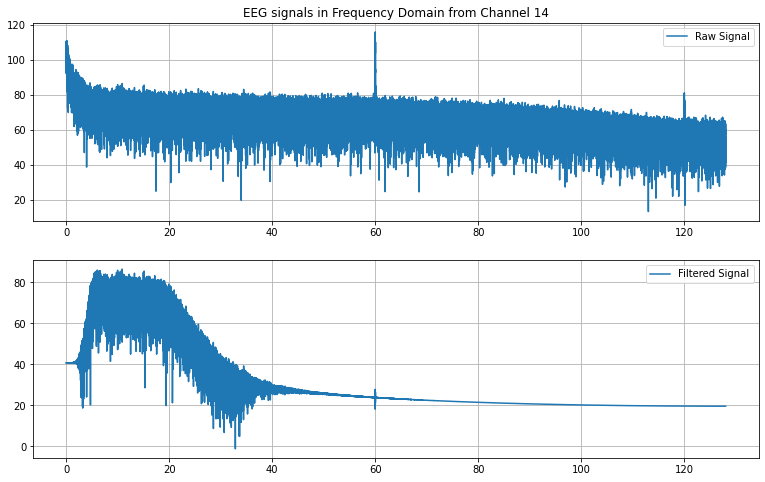

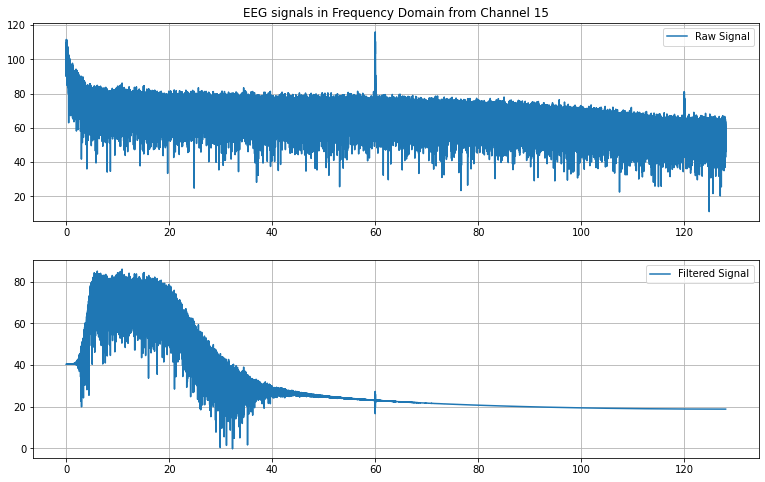

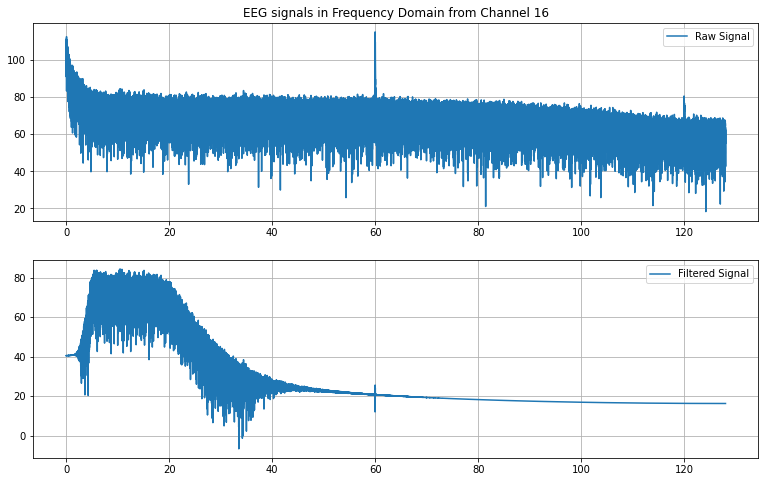

In [ ]:
for i in range(5):
  
  plt.figure(figsize=(13,8))
  # plt.plot(df_eeg_raw_data[i].values, label="Raw Signal")
  # plt.plot(df_output[i].values, label="Filtered Signal")
  # plt.title("EEG signals in Time Domain from Channel %i" %(i+12))
  
  plt.subplot(2, 1, 1)
  # plt.ylim([-400, 300])
  plt.gca().set_title("EEG signals in Frequency Domain from Channel %i" %(i+12))
  plt.plot(xf, df_freq_raw[i], label="Raw Signal")
  plt.grid()
  plt.legend()

  plt.subplot(2, 1, 2)
  # plt.ylim([-400, 300])
  plt.plot(xf, df_freq_filtered[i], label="Filtered Signal")

  plt.grid()
  plt.legend()
  plt.show()

# **2. EEG_segmented**

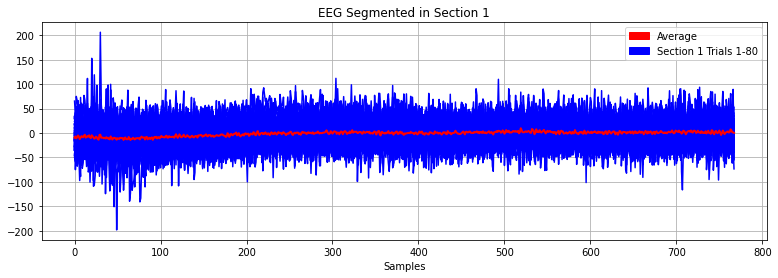

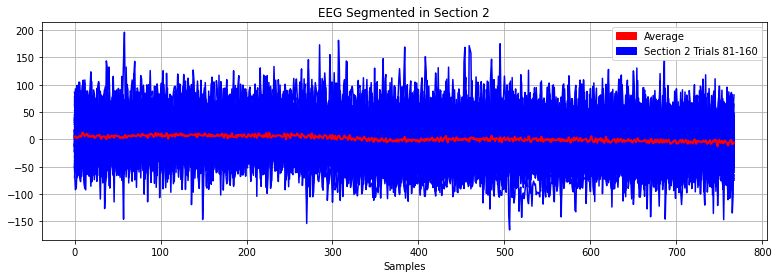

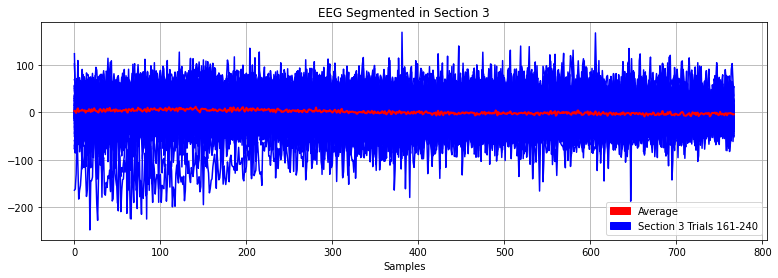

In [ ]:
import matplotlib.patches as mpatches

for k in range(3):
  plt.figure(figsize=(13,4))

  for i in range(80):
    plt.plot(eeg_segmented[k*80+i][:,11], 'b')

  avg=[]
  for i in range(768):
    temp=[]
    for j in range(80):
      temp.append(eeg_segmented[k*80+j][i][11])
    avg.append(np.mean(temp))

  plt.plot(avg, 'r',linewidth=2)

  blue_patch = mpatches.Patch(color='blue', label='Section '+str(k+1)+' Trials '+str(80*k+1)+'-'+str(80*k+80))
  red_patch = mpatches.Patch(color='red', label='Average')

  plt.legend(handles=[red_patch, blue_patch])

  plt.xlabel('Samples')
  # plt.ylabel('Power (dB)')
  plt.title("EEG Segmented in Section %i" %(k+1))
  plt.grid()
  # plt.legend(loc='upper right')

  plt.show()